<a href="https://colab.research.google.com/github/mlcafe/Pengenalan-ML/blob/master/4_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs

Data

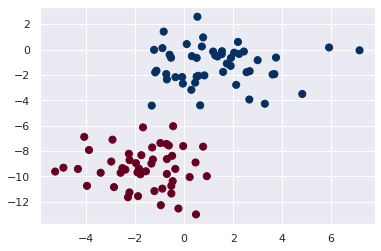

In [ ]:
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

**Gaussian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-09)

Predict new data

In [ ]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

In [ ]:
ynew[10:20]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

Posterior probabilities

In [ ]:
yprob = model.predict_proba(Xnew)
yprob[10:20].round(3)

array([[0.   , 1.   ],
       [0.   , 1.   ],
       [0.002, 0.998],
       [0.   , 1.   ],
       [0.94 , 0.06 ],
       [0.   , 1.   ],
       [0.004, 0.996],
       [0.013, 0.987],
       [0.   , 1.   ],
       [0.   , 1.   ]])

**Multinomial Naive Bayes**

In [ ]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
categories = ['rec.motorcycles', 'misc.forsale','sci.med','sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [ ]:
print(train.data[5])


From: mmm@cup.portal.com (Mark Robert Thorson)
Subject: Re: Cellular Phone (Portable) for sale
Organization: The Portal System (TM)
Distribution: usa
Lines: 7

I offer $100, shipment at seller's expense, payment as personal check
sent by U.S. mail within 24 hours after receiving goods.  I reserve the
right to return the goods, at my expense, if I find them to be defective
or otherwise unacceptable when I receive them (either the merchandise or
the check would be mailed within 24 hours).

Mark Thorson



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB 
from sklearn.pipeline import make_pipeline
import pandas as pd

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

TFIDF vectorizer

In [ ]:
# set of documents
train_doc = ['The sky is blue.','The sun is bright.']
test_doc = ['The sun in the sky is bright', 'We can see the shining sun, the bright sun.']

countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
# convert th documents into a matrix
count_wm = countvectorizer.fit_transform(train_doc)
tfidf_wm = tfidfvectorizer.fit_transform(train_doc)
#retrieve the terms found in the corpora
# if we take same parameters on both Classes(CountVectorizer and TfidfVectorizer) , it will give same output of get_feature_names() methods)
#count_tokens = tfidfvectorizer.get_feature_names() # no difference
count_tokens = countvectorizer.get_feature_names()
tfidf_tokens = tfidfvectorizer.get_feature_names()

df_countvect = pd.DataFrame(data = count_wm.toarray(),index = ['Doc1','Doc2'],columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),index = ['Doc1','Doc2'],columns = tfidf_tokens)

print("Count Vectorizer\n")
print(df_countvect)
print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect)

Count Vectorizer

      blue  bright  sky  sun
Doc1     1       0    1    0
Doc2     0       1    0    1

TD-IDF Vectorizer

          blue    bright       sky       sun
Doc1  0.707107  0.000000  0.707107  0.000000
Doc2  0.000000  0.707107  0.000000  0.707107


Train and predict

In [ ]:
model.fit(train.data, train.target)
labels = model.predict(test.data)


Evaluation

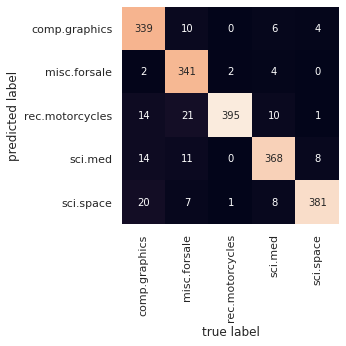

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Predict from a string

In [ ]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]


In [ ]:
predict_category('sending a rocket to the ISS')


'sci.space'

In [ ]:
predict_category('determining the screen resolution')


'comp.graphics'

In [ ]:
predict_category('pay to the seller first to reserve the good')


'misc.forsale'